In [2]:
import algo_func
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg
import matplotlib
import scipy as sp
import importlib
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('elec_data.csv',index_col = 0)
scaler = StandardScaler()
ot = np.expand_dims(data['OT'].array,axis =1)
ot_ = scaler.fit_transform(ot)

In [4]:
train,valid,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

In [5]:
step_size = np.linspace(0.001,0.013,13)

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size:
    
    y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 279121.17it/s]

[0.0038648442611408304, 0.0016714582306028838, 0.0012385290829664908, 0.0014683566479321084, 0.0018721281225836078, 0.002262459578722054, 0.002591833077889968, 0.002866383883517194, 0.0031079928105961214, 0.003339112777409935, 0.003577596256602569, 0.0038357171075885706, 0.004120796004779491]
[0.0028680045557581673, 0.0012337730401402811, 0.00095168707668949, 0.0011672937101095777, 0.0014998119921929935, 0.0018053133301814766, 0.0020491736286418942, 0.0022381518298516183, 0.0023907616371291606, 0.0025255903952838515, 0.0026574349388683817, 0.0027966581646850846, 0.002949739609767293]


In [6]:
np.min(mse_val_step)

0.00095168707668949

In [8]:
gg = np.argmin(mse_val_step)
step_size[gg]

0.003

In [20]:
ip_test = test
op_test = test[fil_order+1:]

In [11]:
#step_size_2 = np.linspace(0.002,0.004,21)

step_size_2 = np.linspace(0.0029,0.0030,11)

mse_train_step = []
mse_val_step = []
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]


for step in step_size_2:
    
    y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step)
    mse_train_step.append(algo_func.mse(ip_train,op_train,w[-1]))
    mse_val_step.append(algo_func.mse(ip_val,op_val,w[-1]))

print(mse_train_step)
print(mse_val_step)

gg =np.argmin(mse_val_step)
print(mse_val_step[gg])
print(step_size_2[gg])

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 278952.11it/s]

[0.0012402574052415003, 0.00123978422947445, 0.0012393797466782653, 0.0012390432166230535, 0.0012387739042233647, 0.0012385710795347205, 0.0012384340177494036, 0.001238361999191256, 0.0012383543093100519, 0.001238410238674787, 0.0012385290829664908]
[0.0009483272754592175, 0.0009484377129967235, 0.0009485997954563947, 0.0009488129441391808, 0.0009490765843886274, 0.0009493901455886073, 0.0009497530611604931, 0.0009501647685595012, 0.0009506247092706955, 0.0009511323288041091, 0.00095168707668949]
0.0009483272754592175
0.0029


### best step size for lms is 0.0029

100%|█████████████████████████████████████| 9992/9992 [00:00<00:00, 137912.32it/s]

(0.0012402574052415003, array([ 0.00278652, -0.02848514, -0.05009322, ..., -0.04019776,
        0.04769881,  0.01250643]))
(0.0009483272754592175, array([ 3.38149239e-02,  1.89577991e-03, -2.19152673e-02, -3.24120720e-03,
       -2.41504011e-03,  5.11872720e-03,  1.12591705e-02,  2.25563835e-02,
        4.94606251e-02,  3.83373002e-02,  3.76832221e-02,  9.33873039e-03,
       -3.76541158e-02, -6.13890252e-02,  3.27927604e-03,  3.06945902e-02,
        5.09399868e-03, -6.30189024e-03,  2.68965318e-03,  4.36949972e-02,
        6.86707511e-02,  5.52596848e-02,  3.10444525e-02,  1.83447626e-02,
       -6.66936653e-03,  1.12693404e-02,  1.65291081e-02,  2.07581771e-02,
        1.03347495e-02,  9.43795591e-03,  1.23268158e-02,  4.26737543e-03,
        4.36723112e-02,  3.50702580e-02,  3.68308976e-02,  1.32366457e-02,
       -3.76479322e-02, -3.61872295e-02,  3.11717356e-02,  2.96344576e-03,
       -1.86383261e-02, -4.47252735e-03,  3.68537474e-02,  5.19714947e-02,
        5.55654083e-02,  3.5

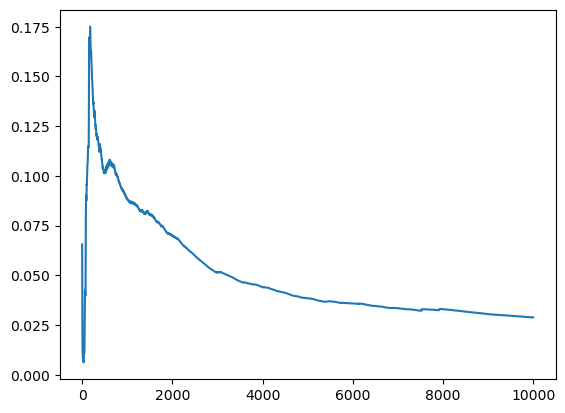

In [228]:
step_size_best = 0.0029

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1]))
print(algo_func.mse(ip_val,op_val,w[-1]))

plt.plot(algo_func.learn_curve(e))

In [13]:
def pred(ip,w):
    
    ip = ip[:,0]
    len_w = len(w)
    y = sg.lfilter(w,1,ip)
    y = y[len_w:]
    
    return y

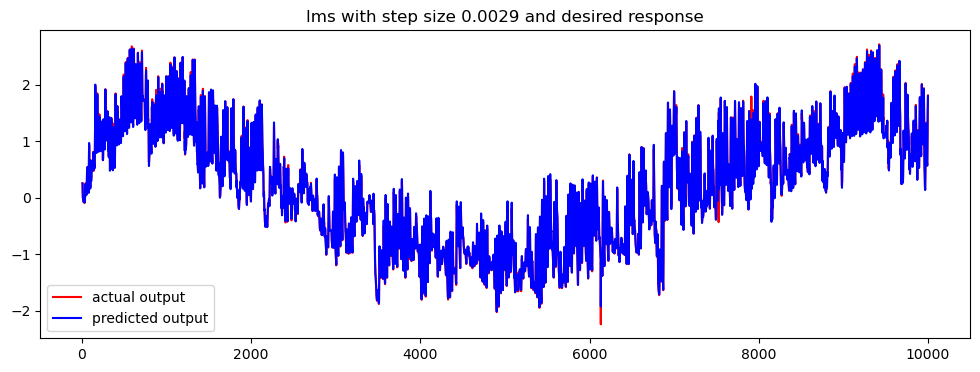

In [23]:
# for train

ser = np.arange(fil_order+1,len(ip_train))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_train,'-r',label = 'actual output')
plt.plot(ser,pred(ip_train,w[-1]),'-b',label = 'predicted output')
plt.title('lms with step size 0.0029 and desired response')
plt.legend()

0.0009483272754592175


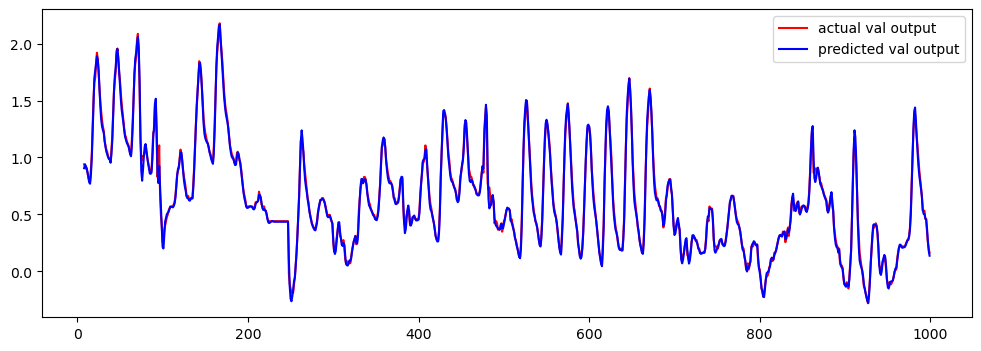

In [24]:
ser = np.arange(fil_order+1,len(ip_val))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_val,'-r',label = 'actual val output')
plt.plot(ser,pred(ip_val,w[-1]),'-b',label = 'predicted val output')
plt.legend()
print(algo_func.mse(ip_val,op_val,w[-1]))

0.0009330833764414353


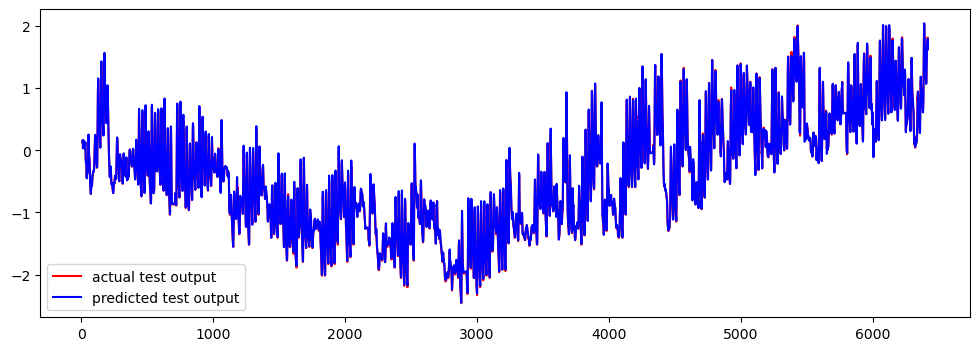

In [25]:
ser = np.arange(fil_order+1,len(ip_test))
fig = plt.figure(figsize = (12,4))
plt.plot(ser,op_test,'-r',label = 'actual test output')
plt.plot(ser,pred(ip_test,w[-1]),'-b',label = 'predicted test output')
plt.legend()
print(algo_func.mse(ip_test,op_test,w[-1]))

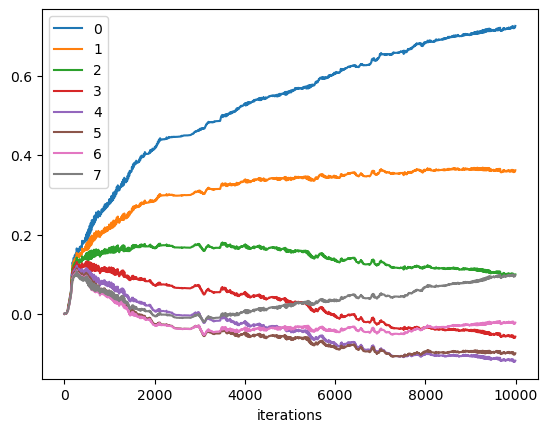

In [229]:
# weight tracks

algo_func.wt_tracks(w)

## training lms with MCC

In [226]:
kern_size_arr = [0.25]
step_size_arr = [0.00065]
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])[0]
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])[0]

1 1


100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 15.93it/s]


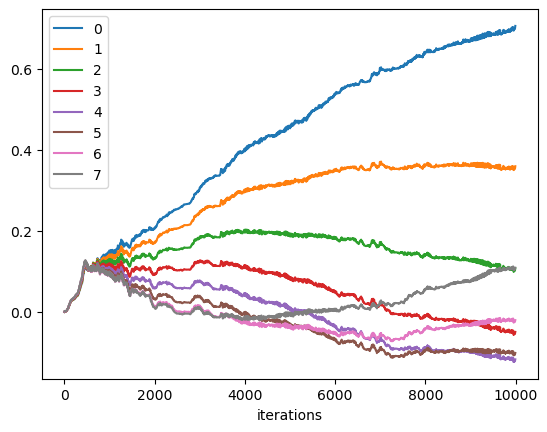

In [227]:
algo_func.wt_tracks(w)

In [46]:
kern_size_arr = np.linspace(0.25,0.35,11)
step_size_arr = np.linspace(0.00055,0.00065,11)
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

11 11


100%|█████████████████████████████████████████| 11/11 [00:05<00:00,  2.01it/s]


In [43]:
mse_train_step

array([[0.03542251, 0.02678115, 0.02146617, 0.01794721, 0.01479435,
        0.0123322 , 0.01028449, 0.0082136 , 0.00591311, 0.00319118,
        0.00135316],
       [0.00283282, 0.00162031, 0.00107084, 0.00108053, 0.00143089,
        0.00186408, 0.00235819, 0.00281904, 0.00322724, 0.00359188,
        0.00393009],
       [0.00141234, 0.00108102, 0.00112335, 0.00136367, 0.00169393,
        0.00204978, 0.00239327, 0.00270786, 0.00298989, 0.00324229,
        0.00347119],
       [0.00147448, 0.00118178, 0.00116175, 0.00130678, 0.00153984,
        0.00180922, 0.00208317, 0.00234426, 0.00258452, 0.00280195,
        0.00299798],
       [0.00170669, 0.00132848, 0.00119186, 0.00121926, 0.00134944,
        0.00153744, 0.00175229, 0.00197382, 0.00218978, 0.00239347,
        0.00258193]])

In [45]:
mse_val_step

array([[0.0242886 , 0.01814586, 0.01441014, 0.01197591, 0.00982152,
        0.00816584, 0.00680874, 0.00545543, 0.00397759, 0.00224768,
        0.00105591],
       [0.00210746, 0.0012346 , 0.00084006, 0.00085943, 0.00112081,
        0.00143319, 0.00178569, 0.00210608, 0.00238148, 0.00261847,
        0.0028312 ],
       [0.00106013, 0.00083753, 0.0008938 , 0.00109281, 0.00135165,
        0.00162196, 0.00187575, 0.0021014 , 0.00229698, 0.0024654 ,
        0.00261186],
       [0.00109697, 0.00090047, 0.00090974, 0.00104071, 0.00123349,
        0.00144829, 0.00166107, 0.00185893, 0.00203629, 0.00219212,
        0.00232795],
       [0.0012609 , 0.00099509, 0.00091328, 0.00095486, 0.00107196,
        0.00122961, 0.00140389, 0.0015794 , 0.00174697, 0.00190171,
        0.00204165]])

In [47]:
gg = np.argmin(mse_val_step)
kern_id,step_id = np.unravel_index(gg,mse_val_step.shape)
print(kern_size_arr[kern_id])
print(step_size_arr[step_id])
print(mse_val_step[kern_id][step_id])

0.25
0.00065
0.0008018532737344571


In [49]:
kern_size_arr = np.concatenate((np.linspace(2,1,10),np.linspace(0.9,0.1,9)))
step_size_arr = np.concatenate((np.linspace(0.009,0.001,10),np.linspace(0.0009,0.0001,9)))
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

19 19


100%|█████████████████████████████████████████| 19/19 [00:16<00:00,  1.17it/s]


In [50]:
gg = np.argmin(mse_val_step)
kern_id,step_id = np.unravel_index(gg,mse_val_step.shape)
print(kern_size_arr[kern_id])
print(step_size_arr[step_id])
print(mse_val_step[kern_id][step_id])

0.29999999999999993
0.0006000000000000001
0.0008375328011386473


In [51]:
kern_size_arr = np.concatenate((np.linspace(2,1,10),np.linspace(0.9,0.1,9)))
step_size_arr = np.concatenate((np.linspace(0.09,0.01,10),np.linspace(0.009,0.001,9)))
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

19 19


100%|█████████████████████████████████████████| 19/19 [00:16<00:00,  1.17it/s]


In [52]:
gg = np.argmin(mse_val_step)
kern_id,step_id = np.unravel_index(gg,mse_val_step.shape)
print(kern_size_arr[kern_id])
print(step_size_arr[step_id])
print(mse_val_step[kern_id][step_id])

0.8
0.001
0.0009412786558711066


In [59]:
kern_size_arr = np.linspace(0.85,0.75,11)
step_size_arr = np.linspace(0.0005,0.0015,11)
k1,k2 = len(kern_size_arr),len(step_size_arr)
print(k1,k2)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])

11 11
11 11


100%|█████████████████████████████████████████| 11/11 [00:05<00:00,  2.01it/s]


In [60]:
gg = np.argmin(mse_val_step)
kern_id,step_id = np.unravel_index(gg,mse_val_step.shape)
print(kern_size_arr[kern_id])
print(step_size_arr[step_id])
print(mse_val_step[kern_id][step_id])

0.8
0.001
0.0009412786558711066


### on test set best algo for lms with mse and best algo for lms mcc and the effect on kernel size for it.

In [64]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [72]:
step_size_best = 0.0029

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

_,_,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_val,op_val,w[-1])[0])

_,e_lms_test = algo_func.mse(ip_test,op_test,w[-1])

100%|█████████████████████████████████| 9992/9992 [00:00<00:00, 136392.58it/s]

0.0012402574052415003
0.0009483272754592175


In [241]:
step_size_best = 0.00065
kern_size_best = 0.25

_,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size_best,kern_size_best)
print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_val,op_val,w[-1])[0])

_,e_lms_mcc_test_2 = algo_func.mse(ip_test,op_test,w[-1])

0.0010171756421849315
0.0008018532737344571


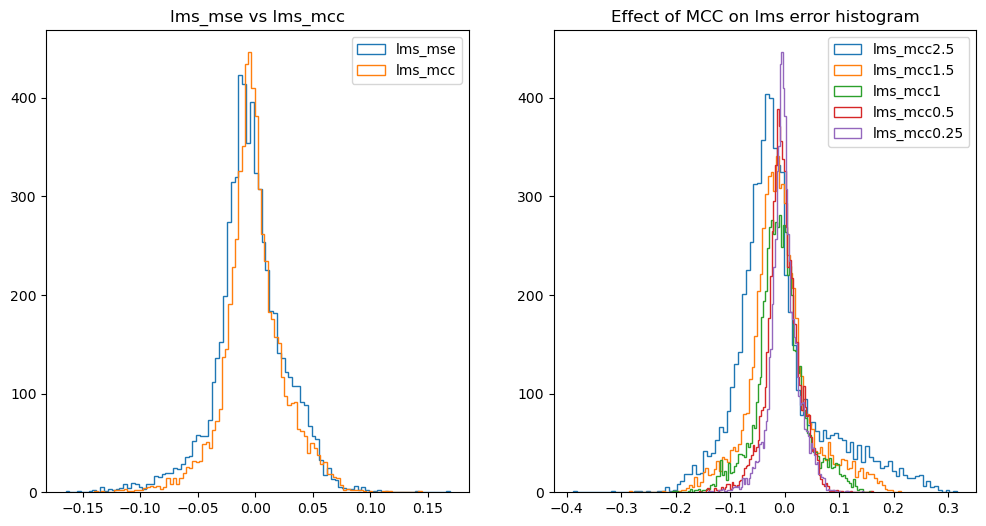

In [243]:
fig,axs = plt.subplots(ncols = 2,figsize = (12,6))
_ = axs[0].hist(e_lms_test,bins = 100,label = 'lms_mse',histtype = 'step')
_ = axs[0].hist(e_lms_mcc_test_2,bins = 100,label = 'lms_mcc',histtype = 'step')
axs[0].legend()
axs[0].set_title('lms_mse vs lms_mcc')

for i in range(k1):
    
    _ = axs[1].hist(eror_mcc[i],bins = 100,label = 'lms_mcc'+str(kern_size_arr[i]),histtype = 'step')
    
axs[1].set_title('Effect of MCC on lms error histogram')
axs[1].legend()

In [242]:
### effect of kernel size in lms_mcc

kern_size_arr = [2.5,1.5,1,0.5,0.25]
step_size_arr = [0.00065]
k1,k2 = len(kern_size_arr),len(step_size_arr)

print(k1,k2)

mse_train_step = np.zeros((k1,k2))
mse_val_step = np.zeros((k1,k2))

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

eror_mcc = []

for i in tqdm(range(k1)):
    
    kern_size = kern_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        _,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size,kern_size)
        mse_train_step[i][j]=algo_func.mse(ip_train,op_train,w[-1])[0]
        mse_val_step[i][j] = algo_func.mse(ip_val,op_val,w[-1])[0]
        
        _,e_lms_mcc_test = algo_func.mse(ip_test,op_test,w[-1])
        
        eror_mcc.append(e_lms_mcc_test)

5 1


100%|███████████████████████████████████████████████| 5/5 [00:00<00:00, 13.06it/s]


In [239]:
for i in range(k1):
    
    _ = axs[1].hist(eror_mcc[i],bins = 100,label = 'lms_mcc'+str(kern_size_arr[i]),histtype = 'step')
    
axs[1].set_title('Effect of MCC on lms error histogram')
plt.show()

##### **for small kernel size there is small spread of the error with appropriate step size.
for large kernel size we can see error more concentrated. 
For the kernel size of 9, there was appropriate step size 0.01
for kernel size of 0.8 it was 0.001 
they both had mse of 0.0009 ,
however for kernel size 0.25 for 0.00065 the error was min at 0.0006
so it can vary depending on the step size. 
for kernel size 0.5 to 0.25 the mse decreased good
but then the spread increased
however same when kernel size increased after 1, the mse decreased with getting more concentrated
but for large step size the error spread increased. 

### Predicting samples ahead for lms mse 1 we did , 10 , 50 on the whole dataset. 

In [184]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [253]:
step_size_best = 0.0029

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_test,op_test,w[-1])[0])

100%|█████████████████████████████████████| 9992/9992 [00:00<00:00, 134451.11it/s]

0.0012402574052415003
0.0009330833764414353


In [254]:
algo_func.mse_lms_ahead(ip_test,op_test,w[-1],10)

100%|███████████████████████████████████████| 6402/6402 [00:00<00:00, 7142.39it/s]


4.033393797918319

In [255]:
algo_func.mse_lms_ahead(ip_test,op_test,w[-1],50)

100%|███████████████████████████████████████| 6362/6362 [00:02<00:00, 2660.58it/s]


2.4122612102462804

### Predicting samples ahead for lms mcc with 10,50

In [220]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [252]:
step_size_best = 0.00065
kern_size_best = 0.25

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

_,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size_best,kern_size_best)

print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_val,op_val,w[-1])[0])


print(algo_func.mse_lms_ahead(ip_train,op_train,w[-1],10))
print(algo_func.mse_lms_ahead(ip_train,op_train,w[-1],50))

0.0010171756421849315
0.0008018532737344571


100%|███████████████████████████████████████| 9982/9982 [00:01<00:00, 5096.33it/s]


3.2694499687718594


100%|███████████████████████████████████████| 9942/9942 [00:05<00:00, 1876.96it/s]

2.6926784495676093


In [225]:
step_size_best = 0.00065
kern_size_best = 0.25

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

_,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size_best,kern_size_best)

print(algo_func.mse(ip_test,op_test,w[-1])[0])
print(algo_func.mse(ip_test,op_test,w[-1])[0])


print(algo_func.mse_lms_ahead(ip_test,op_test,w[-1],10))
print(algo_func.mse_lms_ahead(ip_test,op_test,w[-1],50))

0.0006934684259768209
0.0006934684259768209


100%|█████████████████████████████████████| 6402/6402 [00:00<00:00, 7399.09it/s]


4.5701150852044545


100%|█████████████████████████████████████| 6362/6362 [00:02<00:00, 2642.54it/s]

3.8539175903346314


### Trajectory generator for lms mcc and mse

In [188]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [189]:
ot_threshold = 0.2*np.std(ip_train)

In [190]:
ot_threshold

0.20333503883700177

In [210]:
step_size_best = 0.0029
fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

y,e,w = algo_func.lms_mse(ip_train,op_train,fil_order,step_size_best)
print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_val,op_val,w[-1])[0])

100%|███████████████████████████████████████| 9992/9992 [00:00<00:00, 136989.10it/s]

0.0012402574052415003
0.0009483272754592175


In [120]:
op_train.shape

(9992, 1)

In [211]:
cnt_arr_mse = []
cnt_max = 0
p_max = 0
for i in range(8,len(op_train)-500):

    init_pos = i
    y_trac,cnt,_ = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)
    samp
    if cnt>cnt_max:
        
        p_max = init_pos
        cnt_max_mse = cnt
        
    cnt_arr_mse.append(cnt)

np.average(cnt_arr_mse)

7.034057359763812

In [169]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [193]:
p_max

3372

In [194]:
cnt_max

71

In [195]:
init_pos = p_max
y_trac,cnt,e_arr = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)

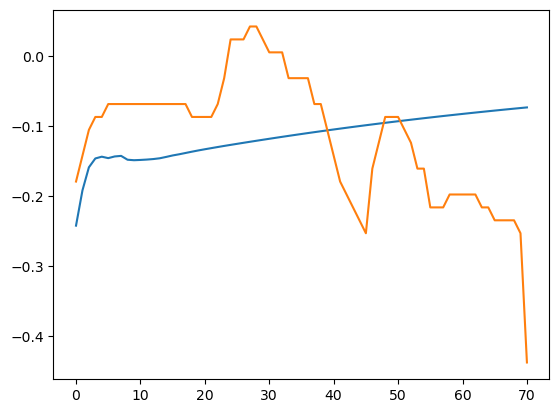

In [196]:
plt.plot(y_trac)
plt.plot(op_train[init_pos - 8:init_pos - 8 +cnt])

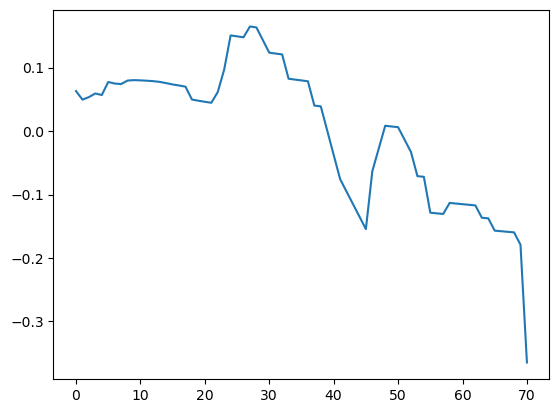

In [197]:
plt.plot(e_arr)

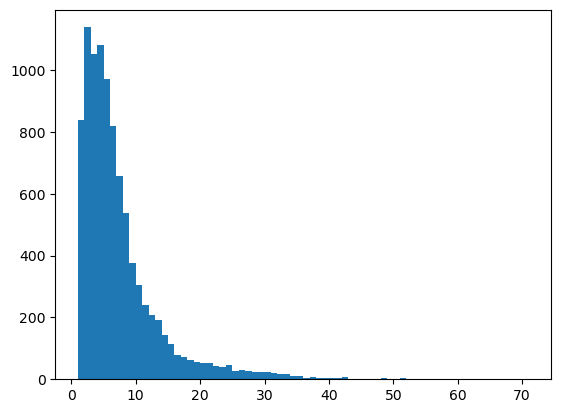

In [202]:
_ = plt.hist(cnt_arr,bins = 70)

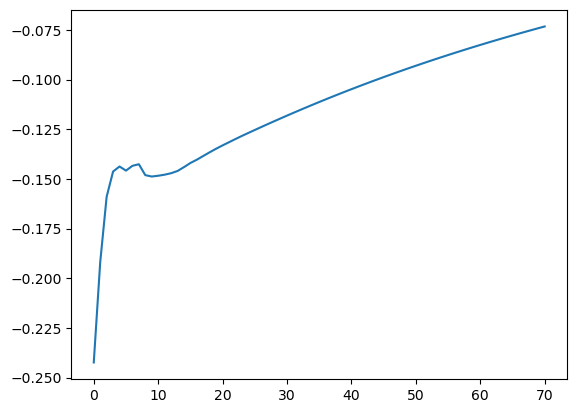

In [203]:
plt.plot(y_trac)

### trajectory generation for lms mcc

In [204]:
step_size_best = 0.00065
kern_size_best = 0.25

fil_order = 7

ip_train = train
op_train = train[fil_order+1:]

ip_val = valid
op_val = valid[fil_order+1:]

_,_,w = algo_func.lms_mcc(ip_train,op_train,fil_order,step_size_best,kern_size_best)

print(algo_func.mse(ip_train,op_train,w[-1])[0])
print(algo_func.mse(ip_val,op_val,w[-1])[0])

0.0010171756421849315
0.0008018532737344571


In [205]:
cnt_arr_mcc = []
cnt_max = 0
p_max = 0
for i in range(8,len(op_train)-500):

    init_pos = i
    y_trac,cnt,_ = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)
    
    if cnt>cnt_max:
        
        p_max = init_pos
        cnt_max = cnt
        
    cnt_arr.append(cnt)

np.average(cnt_arr)

7.315267819485449

In [206]:
init_pos = p_max
y_trac,cnt,e_arr = algo_func.lms_trac_gen(ip_train,op_train,w[-1],init_pos,ot_threshold)

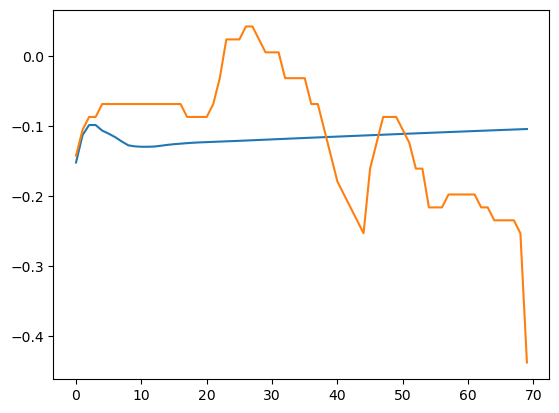

In [207]:
plt.plot(y_trac)
plt.plot(op_train[init_pos - 8:init_pos - 8 +cnt])

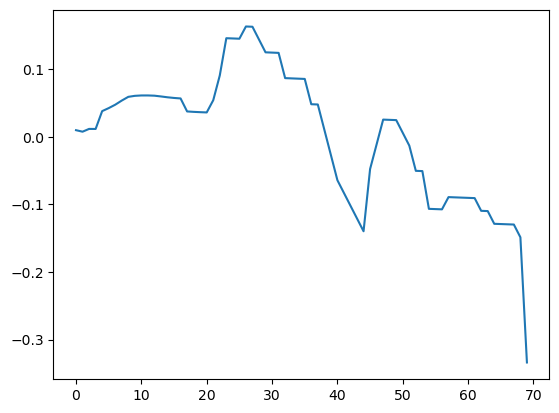

In [208]:
plt.plot(e_arr)

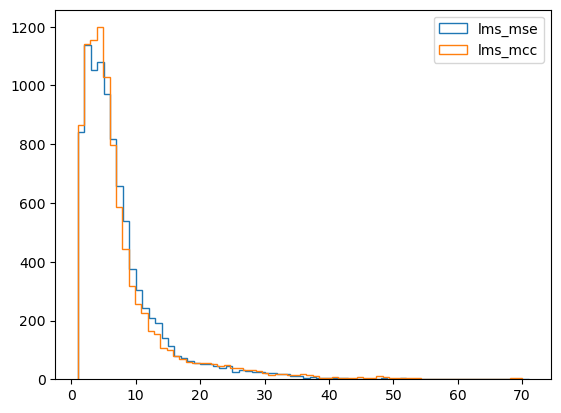

In [214]:
a1 = plt.hist(cnt_arr_mse,bins = 70,label = 'lms_mse',histtype = 'step')
a2 = plt.hist(cnt_arr,bins = 70,label = 'lms_mcc',histtype = 'step')
plt.legend()